**Import Libraries** (manipulasi data dan komputasi numerik)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

**Praprocessing Data**

In [ ]:
data = pd.read_excel('/content/dataclear.xlsx')

In [ ]:
data.head()

,Jumlah_Penduduk,Wilayah,Rumah,Tembok,Sekolah,Rumah_Sakit,Usia,Indihome,Lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


In [ ]:
data.head(20)

,Jumlah_Penduduk,Wilayah,Rumah,Tembok,Sekolah,Rumah_Sakit,Usia,Indihome,Lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada
5,72183,152.070,15942,12906.6432,16,-,49373.172,ada,ada
6,118278,91.940,28307,22917.3472,62,-,80902.152,ada,tidak
7,89712,54.570,21331,17269.5776,33,1,61363.008,ada,tidak
8,140119,51.030,32348,26188.9408,43,-,95841.396,ada,ada
9,100495,40.140,24299,19672.4704,22,1,68738.580,ada,tidak


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "/content/dataclear.xlsx"  # Update this path
df = pd.read_excel(file_path)

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Jumlah_Penduduk  31 non-null     int64  
 1   Wilayah          31 non-null     float64
 2   Rumah            31 non-null     int64  
 3   Tembok           31 non-null     float64
 4   Sekolah          31 non-null     int64  
 5   Rumah_Sakit      31 non-null     object 
 6   Usia             31 non-null     float64
 7   Indihome         31 non-null     object 
 8   Lokal            31 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 2.3+ KB


,Jumlah_Penduduk,Wilayah,Rumah,Tembok,Sekolah,Rumah_Sakit,Usia,Indihome,Lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


In [ ]:
df.tail()

,Jumlah_Penduduk,Wilayah,Rumah,Tembok,Sekolah,Rumah_Sakit,Usia,Indihome,Lokal
26,105855,11.03,22667,18351.2032,24,1,72404.820,ada,tidak
27,114654,27.81,35161,28466.3456,26,-,78423.336,ada,tidak
28,192693,31.58,58611,47451.4656,45,1,131802.012,ada,ada
29,58637,30.12,13574,10989.5104,11,-,40107.708,ada,tidak
30,116789,53.08,24701,19997.9296,28,-,79883.676,ada,ada


In [ ]:
df.head()

,Jumlah_Penduduk,Wilayah,Rumah,Tembok,Sekolah,Rumah_Sakit,Usia,Indihome,Lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


**Menstandarisasi Fitur Numerik di Dataset.**

In [ ]:
# Standardize numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

**Univariate Analysis**

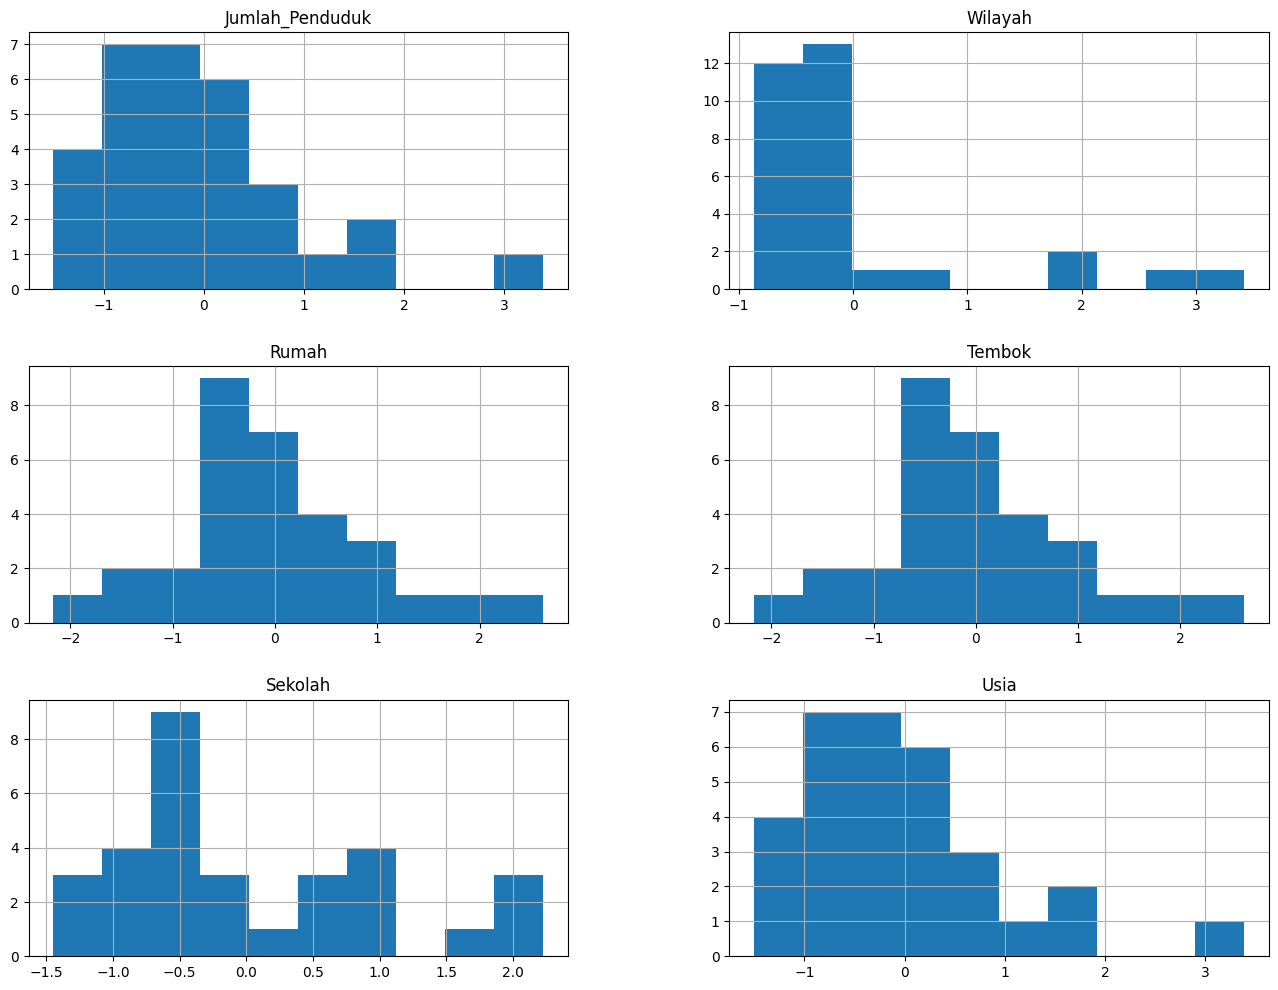

In [ ]:
# prompt: lakukan EDA (univariate dan multivariate analysis, minimal 3 analisis tiap pendekatan)

# Univariate Analysis

# 1. Histograms for numerical features
df.hist(figsize=(16, 12), bins=10)
plt.show()

Gambar ini menunjukkan histogram distribusi dari beberapa variabel numerik setelah dilakukan standarisasi. Setiap subplot menggambarkan distribusi variabel tertentu, yaitu:

1.   **Jumlah Penduduk** - Distribusinya condong ke kiri, dengan sebagian besar data berada di sekitar rata-rata atau di bawahnya.
2.   **Wilayah** - Variabel ini sangat terkonsentrasi di sekitar nilai negatif atau rata-rata, dengan beberapa outlier di bagian kanan.
3. **Rumah** - Data terdistribusi cukup simetris di sekitar rata-rata, menunjukkan pola yang mendekati distribusi normal.
4. **Tembok** - Distribusi variabel ini juga cukup simetris dan mendekati bentuk normal.
5. **Sekolah** - Variabel ini menunjukkan distribusi yang agak beragam, dengan beberapa puncak di berbagai rentang nilai.
6. **Usia** - Distribusi cenderung condong ke kiri, dengan sedikit data di sisi kanan sebagai outlier.

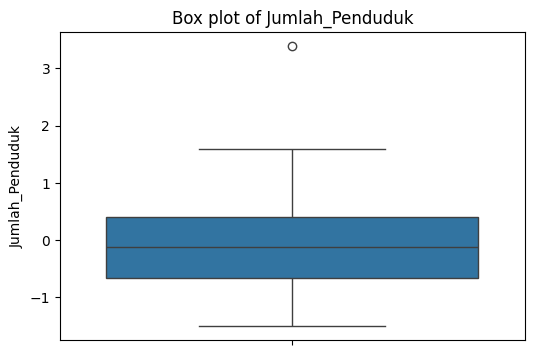

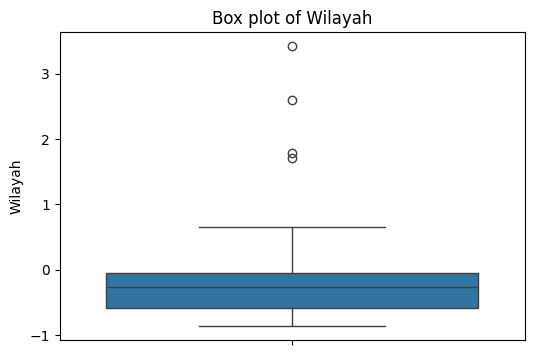

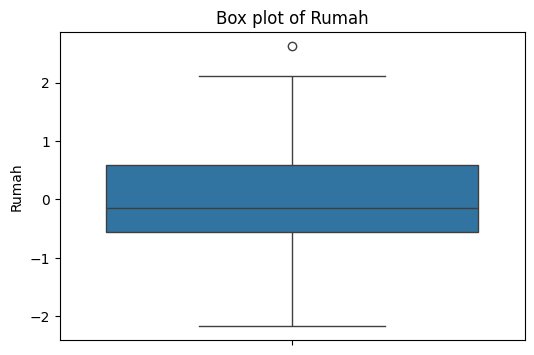

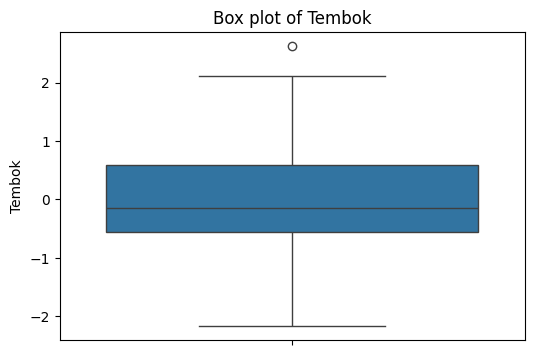

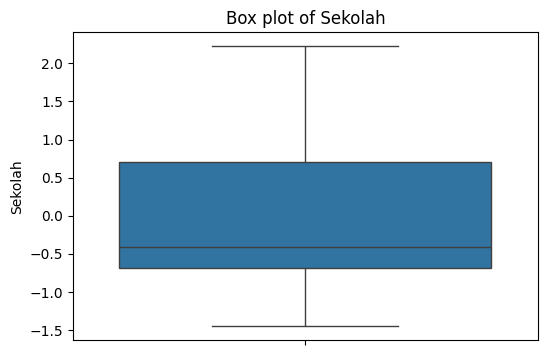

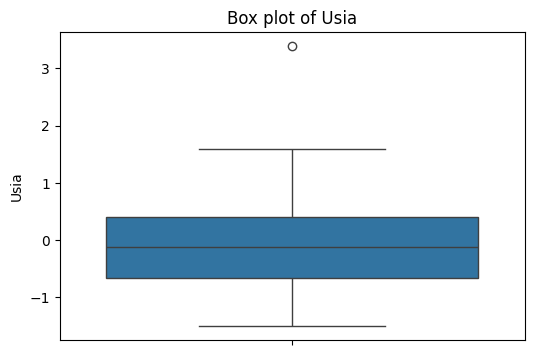

In [ ]:
# 2. Box plots for numerical features to identify outliers
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

Gambar yang Anda berikan adalah box plot untuk variabel "Tembok". Berikut penjelasan tentang arti dari box plot ini:

1. **Median (Garis di dalam Box):** Garis yang berada di dalam kotak (box) menunjukkan median dari data. Ini membagi data menjadi dua bagian, 50% di atas median dan 50% di bawah median.

2. **Interquartile Range (IQR):**

    Box: Bagian kotak mewakili rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data, yang disebut IQR (Interquartile Range). Ini mencakup 50% data di tengah.
    Garis Bawah (Bawah Box): Kuartil pertama (Q1), yaitu nilai di bawah mana 25% dari data berada.
    Garis Atas (Atas Box): Kuartil ketiga (Q3), yaitu nilai di bawah mana 75% dari data berada.

3. **Whiskers (Garis Vertikal di Atas dan Bawah Box):**

    Garis vertikal yang meluas dari kotak (whiskers) menunjukkan rentang data yang tidak termasuk outliers.
    Umumnya whiskers menjangkau data yang berada dalam jarak 1,5 kali IQR dari Q1 dan Q3.

4. **Outliers (Titik di Luar Whiskers):**

    Titik yang berada di luar whiskers (di atas atau di bawah) dianggap sebagai outliers, yaitu nilai yang jauh dari mayoritas data.
    Dalam plot ini, ada satu outlier di atas, yang menandakan bahwa terdapat satu nilai yang lebih tinggi dari jangkauan data utama.

Value counts for Rumah_Sakit:
Rumah_Sakit
-    21
1    10
Name: count, dtype: int64



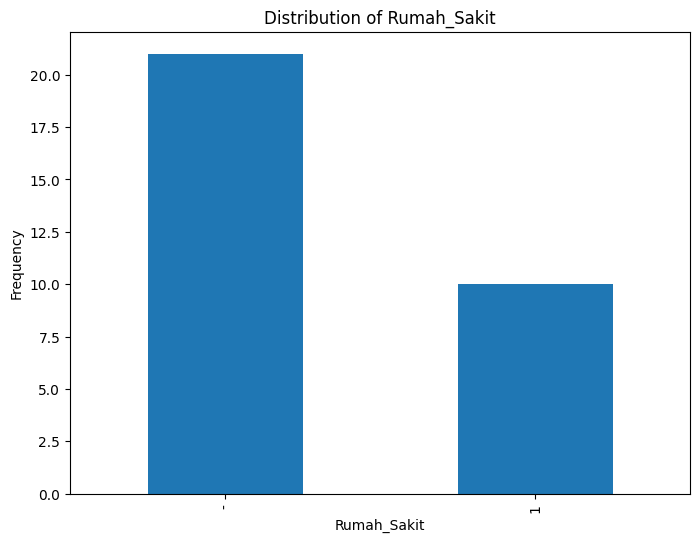

Value counts for Indihome:
Indihome
ada      28
belum     3
Name: count, dtype: int64



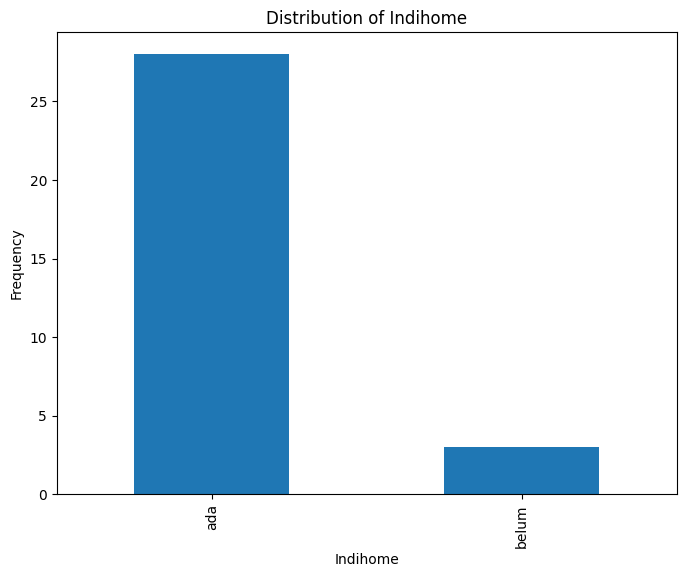

Value counts for Lokal:
Lokal
tidak    18
ada      13
Name: count, dtype: int64



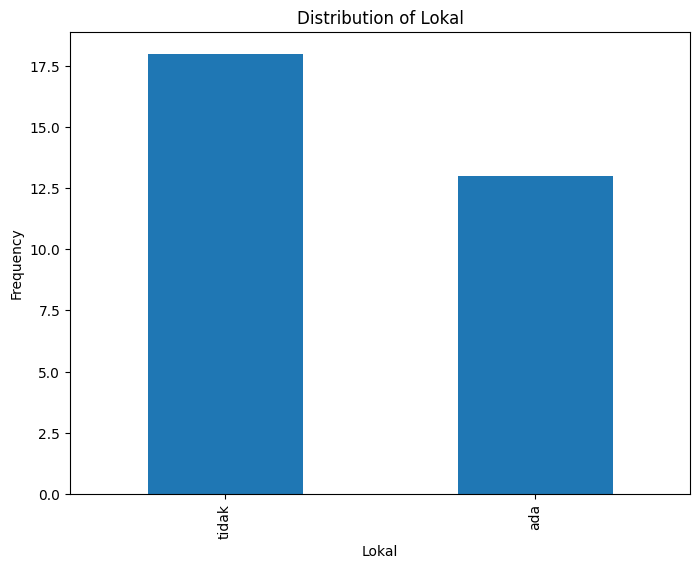

In [ ]:
# 3. Value counts for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f'Value counts for {col}:\n{df[col].value_counts()}\n')
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Gambar yang Anda berikan adalah bar plot untuk variabel "Indihome". Berikut adalah interpretasinya:

Variabel Kategori: Variabel "Indihome" tampaknya bersifat kategorikal, dengan dua kategori utama: "ada" dan "belum".

1. **Frekuensi:**

    Kategori "ada" memiliki jumlah frekuensi yang jauh lebih tinggi dibandingkan dengan kategori "belum".
    Sumbu vertikal (y-axis) menunjukkan frekuensi atau jumlah pengamatan untuk setiap kategori. Dalam hal ini, kategori "ada" mendominasi dengan jumlah frekuensi sekitar 25 atau lebih, sedangkan kategori "belum" memiliki frekuensi yang jauh lebih rendah, mungkin sekitar 5 atau kurang.

2. **Distribusi:**

    Grafik ini menunjukkan bahwa sebagian besar data dalam variabel "Indihome" berada dalam kategori "ada", yang berarti bahwa sebagian besar pengamatan memiliki layanan Indihome.
    Sebaliknya, hanya sedikit data yang termasuk dalam kategori "belum", yang menunjukkan bahwa sedikit pengamatan yang tidak memiliki layanan tersebut.

In [ ]:
print(df.columns)

Index(['Jumlah_Penduduk', 'Wilayah', 'Rumah', 'Tembok', 'Sekolah',
       'Rumah_Sakit', 'Usia', 'Indihome', 'Lokal'],
      dtype='object')


**Multivariate**

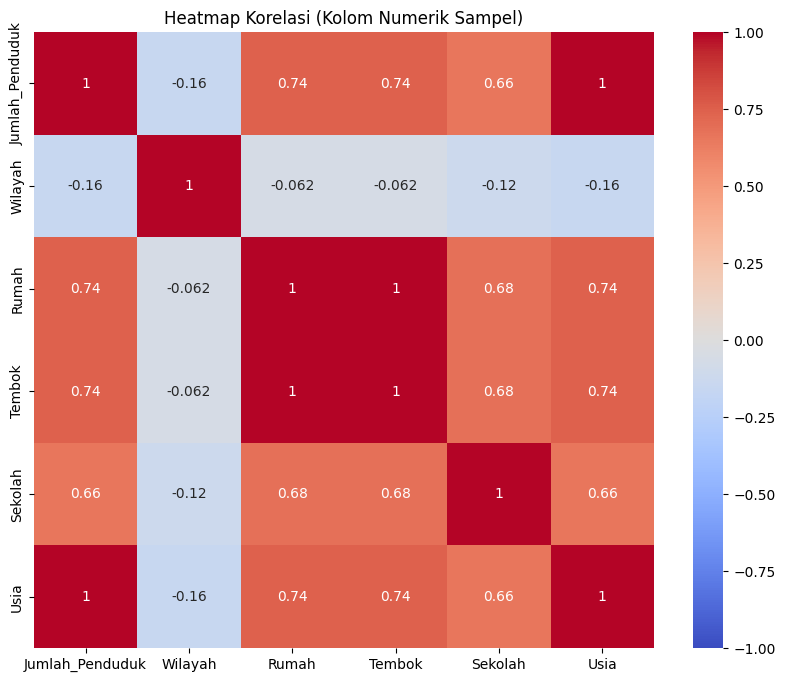

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/dataclear.xlsx'
data = pd.read_excel(file_path)

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=[float, int])

# Generate heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi (Kolom Numerik Sampel)')
plt.show()

Gambar ini berikan adalah heatmap korelasi yang menunjukkan hubungan antar variabel numerik dalam dataset. Berikut penjelasannya:

1. **Interpretasi Warna:**

    Warna merah menunjukkan korelasi positif yang kuat (mendekati +1), artinya kedua variabel tersebut bergerak searah; ketika satu variabel meningkat, variabel lainnya cenderung meningkat.
    Warna biru menunjukkan korelasi negatif yang kuat (mendekati -1), artinya kedua variabel bergerak berlawanan arah; ketika satu variabel meningkat, variabel lainnya cenderung menurun.
    Warna yang lebih dekat dengan putih atau abu-abu menunjukkan korelasi yang lemah atau tidak signifikan (mendekati 0).

2. **Korelasi Tinggi:**

    Variabel seperti Rumah dan Tembok memiliki korelasi positif yang sangat kuat (korelasi = 1), yang berarti bahwa jumlah rumah berkaitan erat dengan tembok yang ada. Hal ini mungkin menunjukkan bahwa variabel ini berpotensi sangat terkait atau bahkan saling mewakili.
    Jumlah_Penduduk, Rumah, Tembok, dan Usia juga memiliki korelasi positif cukup kuat satu sama lain (sekitar 0.74), menunjukkan bahwa wilayah dengan jumlah penduduk tinggi cenderung memiliki lebih banyak rumah dan tembok, serta usia penduduk yang lebih tinggi.

3. **Korelasi Rendah atau Negatif:**

    Variabel Wilayah memiliki korelasi negatif yang lemah atau mendekati nol dengan sebagian besar variabel lainnya, menunjukkan bahwa ukuran wilayah tidak berhubungan erat dengan variabel lain dalam dataset ini.

4. **Penggunaan Heatmap:**

    Heatmap ini membantu dalam mengidentifikasi variabel-variabel yang sangat berkorelasi, sehingga kita bisa mempertimbangkan untuk mengeliminasi atau menggabungkan beberapa fitur yang mungkin redundant dalam analisis lebih lanjut.

**Clustering K-Means PCA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
file_path = '/content/dataclear.xlsx'
data = pd.read_excel(file_path)

# Select only numerical columns for clustering
numerical_data = data.select_dtypes(include=[float, int])

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Set up a range for the number of clusters to experiment with
k_values = range(2, 10)  # Trying values from 2 to 9
cluster_results = {}

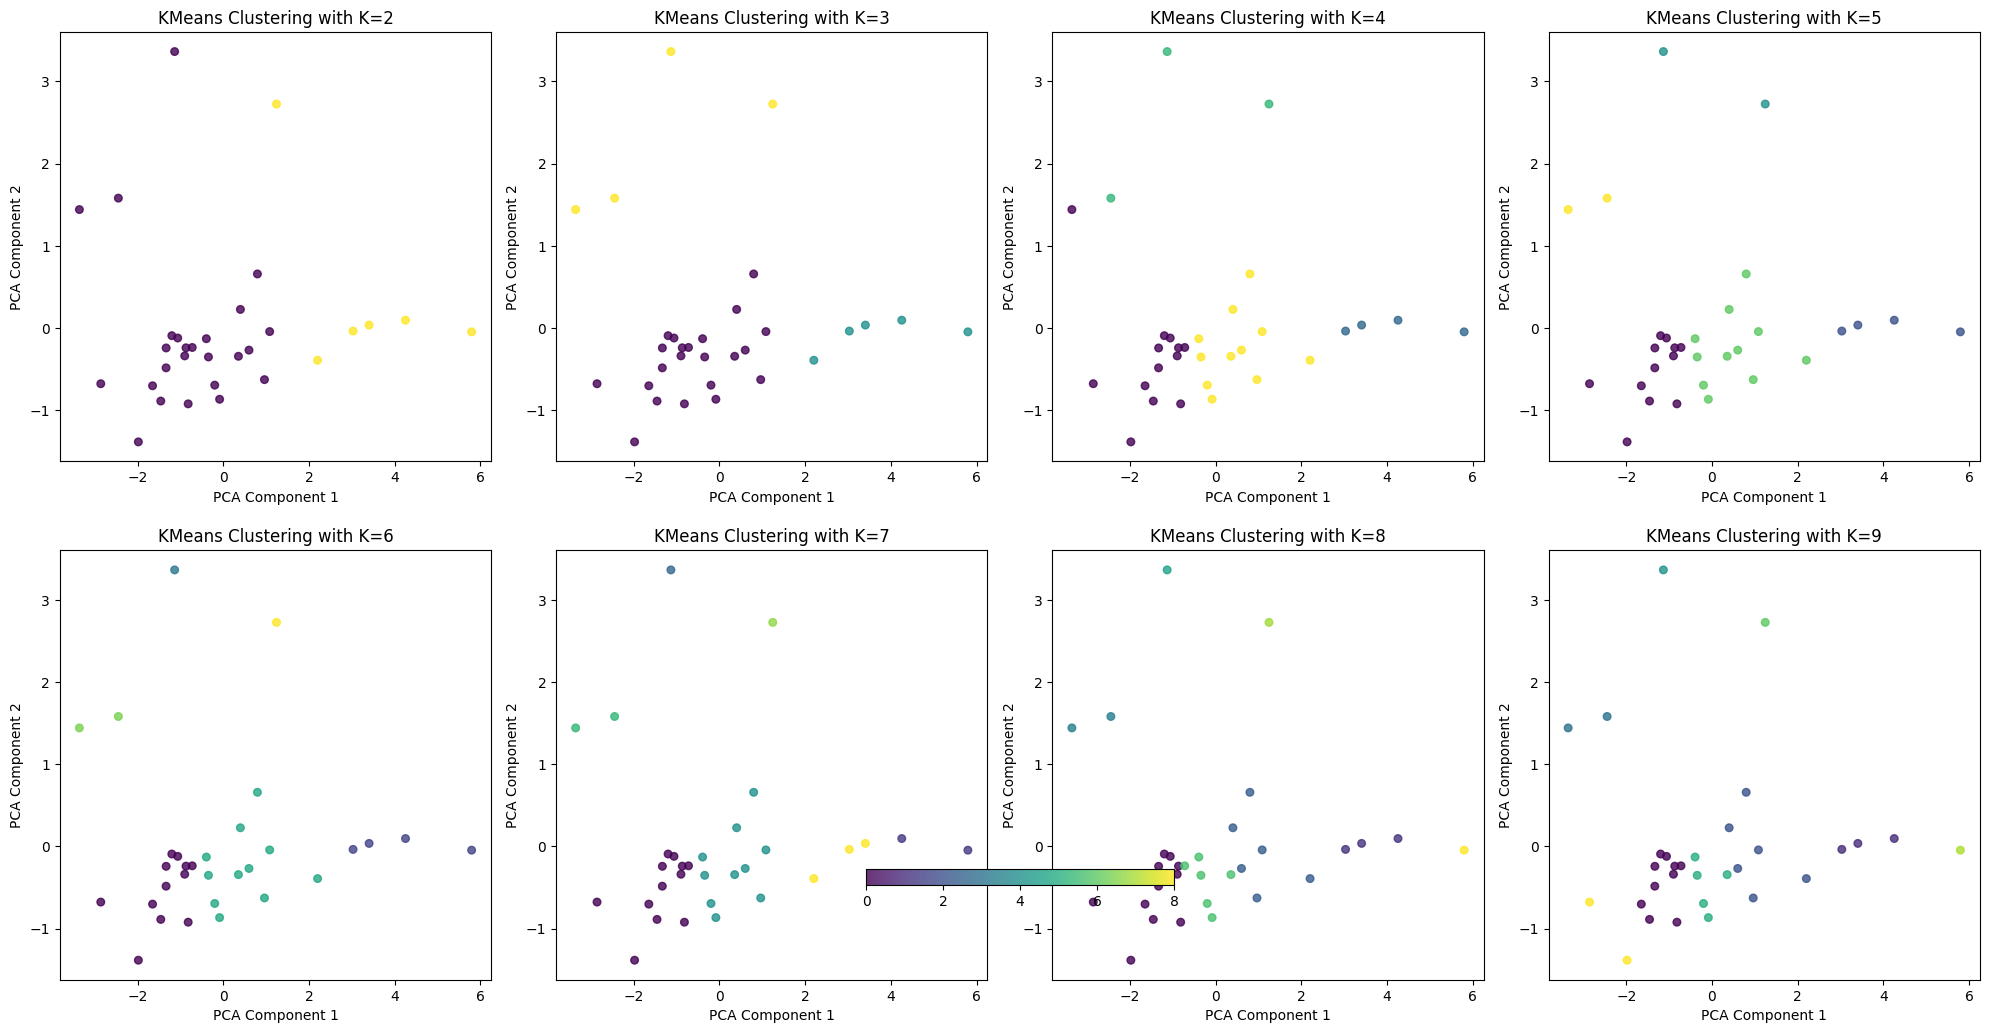

In [ ]:
# Fit KMeans for each K value and store the cluster labels
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca)
    cluster_results[k] = cluster_labels  # Store the labels for each K value

# Prepare scatter plots for each K value to visualize density
fig, axes = plt.subplots(2, 4, figsize=(20, 10), squeeze=False)
axes = axes.flatten()

for i, k in enumerate(k_values):
    scatter = axes[i].scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_results[k], cmap="viridis", s=30, alpha=0.8)
    axes[i].set_title(f'KMeans Clustering with K={k}')
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')

# Add color bar to indicate cluster labels
fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
plt.tight_layout()
plt.show()

Gambar ini menunjukkan hasil klasterisasi menggunakan algoritma K-Means dengan nilai K yang berbeda-beda (dari K=2 hingga K=9). Setiap subplot merepresentasikan hasil klasterisasi dengan nilai K tertentu, yang ditampilkan dalam ruang dua dimensi hasil dari Principal Component Analysis (PCA), yaitu PCA Component 1 dan PCA Component 2.

Berikut adalah penjelasan umum untuk setiap subplot:

1. K=2 hingga K=9 menunjukkan pembagian data menjadi 2 hingga 9 klaster.
2. Warna yang berbeda dalam setiap subplot merepresentasikan klaster yang berbeda-beda, yang merupakan hasil dari algoritma K-Means.
3. Dengan bertambahnya nilai K, jumlah klaster semakin banyak, dan data terpecah menjadi klaster yang lebih kecil.
4. Visualisasi ini membantu untuk menentukan nilai K yang paling tepat (biasanya dengan melihat distribusi data yang lebih natural di dalam klaster).

Dalam konteks ini, metode Elbow Method atau Silhouette Score sering digunakan untuk menentukan nilai K optimal, karena nilai K yang terlalu tinggi bisa menyebabkan overfitting (klaster terlalu kecil dan tidak representatif). Dari gambar ini, kita bisa melihat bahwa distribusi mulai terlihat terpecah dengan baik ketika K=4 atau K=5, tetapi pemilihan nilai K yang optimal memerlukan analisis lebih lanjut.

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1614
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2169 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2334
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3057 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2299 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1916 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2804  
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2422
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2060
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1393
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2027 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1593
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2224  
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2770 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1880 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━

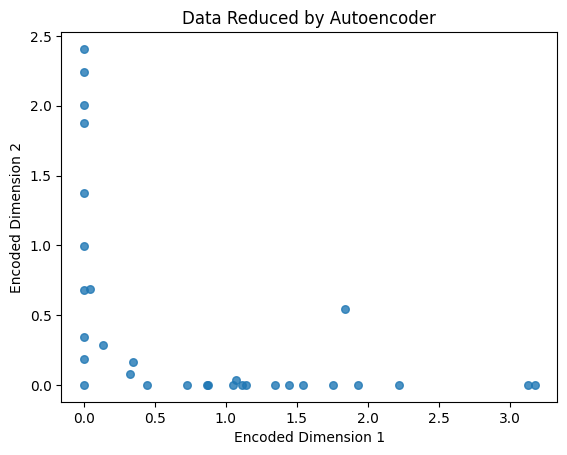

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Define dimensions
input_dim = data_scaled.shape[1]
encoding_dim = 2  # Dimensi rendah yang diinginkan

# Build the autoencoder model
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16, shuffle=True)

# Extract the encoder to reduce dimensions
encoder_model = Model(inputs=input_layer, outputs=encoder)
data_ae = encoder_model.predict(data_scaled)

# Visualize the reduced data
plt.scatter(data_ae[:, 0], data_ae[:, 1], cmap="viridis", s=30, alpha=0.8)
plt.title("Data Reduced by Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()


Gambar ini menunjukkan hasil reduksi dimensi dari data menggunakan algoritma Autoencoder (AE). Berikut adalah beberapa poin untuk menjelaskan arti dari gambar ini:

1. **Sumbu X (Encoded Dimension 1) dan Sumbu Y (Encoded Dimension 2):**

    Kedua sumbu ini mewakili dua dimensi yang dihasilkan dari proses encoding oleh Autoencoder. Karena kita menggunakan encoding dua dimensi, data diwakili dalam ruang dua dimensi ini.
    Setiap titik pada grafik menggambarkan satu sampel dari data asli, yang telah direduksi ke dalam dua fitur utama yang dihasilkan oleh Autoencoder.
2. **Distribusi Data:**

    Kebanyakan titik berada di dekat titik asal (0,0), menunjukkan bahwa mayoritas data setelah proses encoding memiliki nilai yang rendah dalam kedua dimensi ini.
    Beberapa titik tersebar lebih jauh di sepanjang sumbu Y, sementara beberapa lainnya juga sedikit terdistribusi di sepanjang sumbu X.
    Ini mungkin menunjukkan bahwa beberapa data memiliki karakteristik yang berbeda dari data lainnya, sehingga membutuhkan representasi yang sedikit lebih besar dalam ruang yang dihasilkan.
3. **Interpretasi Kedekatan:**

    Titik-titik yang lebih berdekatan menunjukkan bahwa sampel-sampel tersebut memiliki kesamaan karakteristik dalam ruang berdimensi rendah.
    Titik-titik yang lebih jauh atau tersebar bisa menunjukkan outliers atau sampel dengan karakteristik yang lebih unik dibandingkan mayoritas data.
4. **Kemungkinan Kompresi Data:**

    Karena Autoencoder mengkompres data ke dalam dua dimensi ini, beberapa informasi dalam data asli telah disederhanakan. Oleh karena itu, informasi utama dari data tetap terjaga dalam ruang dua dimensi ini, namun mungkin tidak dapat menangkap kompleksitas penuh dari data asli.
5.** Aplikasi Lanjutan:**

    Gambar ini dapat digunakan untuk analisis clustering atau pengelompokan, karena kita dapat melihat beberapa area kosong (tanpa titik) dan area dengan kepadatan tinggi. Hal ini bisa diikuti dengan algoritma clustering untuk menentukan apakah ada pola cluster tertentu dalam data.